# Packages

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, KFold, GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

*Data source : https://www.kaggle.com/annavictoria/speed-dating-experiment*

# EDA

In [2]:
df = pd.read_csv('data/Speed Dating Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
pd.crosstab(index=df['match'],columns="count") 

col_0,count
match,
0,6998
1,1380


By default, class 0 is over-represented in our target variable.

# Data Cleaning

In [6]:
df = df.drop(['iid', 'id', 'idg', 'pid'], axis = 1) # Useless

In [7]:
# Count "?", les " " and "NaN" in a df
def count_sym_df(df):
    cols = df.columns
    sym1 = ['?']
    sym2 = ['" "']
    sym3 = [np.NaN]
    counting_interro = {}
    counting_space = {}
    counting_NaN = {}

    for j in sym1:
        for i in cols:
            c = df.loc[:,i][df.loc[:,i] == j].count()
            counting_interro[i] = c     

    for j in sym2:
        for i in cols:
            c = df.loc[:,i][df.loc[:,i] == j].count()
            counting_space[i] = c

    for j in sym3:
        for i in cols:
            c = df.loc[:,i].isna().sum()
            counting_NaN[i] = c

    df_sym = pd.DataFrame({'?': counting_interro, '" "': counting_space, 'NaN': counting_NaN})
    return df_sym

count_sym_df(df)

,?,""" """,NaN
gender,0,0,0
condtn,0,0,0
wave,0,0,0
round,0,0,0
position,0,0,0
...,...,...,...
attr5_3,0,0,6362
sinc5_3,0,0,6362
intel5_3,0,0,6362
fun5_3,0,0,6362


In [8]:
obj_data=[]
num_data=[]

for i, c in enumerate(df.dtypes):
    if c == object:
        obj_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

obj_data=pd.DataFrame(obj_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [9]:
target = num_data['match']
target

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
8373    0.0
8374    0.0
8375    0.0
8376    0.0
8377    0.0
Name: match, Length: 8378, dtype: float64

In [10]:
obj_data

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
1,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
2,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
3,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
4,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
...,...,...,...,...,...,...,...,...
8373,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...
8374,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...
8375,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...
8376,Climate Dynamics,"Ecole Normale Suprieure, Paris",NaN,NaN,France,"78,110",NaN,assistant master of the universe (otherwise it...


In [11]:
num_data.isnull().sum()

gender         0
condtn         0
wave           0
round          0
position       0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 183, dtype: int64

In [12]:
# Count NaN by columns
pd.set_option('display.max_rows', num_data.shape[0])

def percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

miss_val = percent_missing(num_data)
miss_val

,percent_missing
gender,0.000000
condtn,0.000000
wave,0.000000
round,0.000000
position,0.000000
positin1,22.033898
order,0.000000
partner,0.000000
match,0.000000
int_corr,1.885892


In [13]:
# Recovery of columns that have a percentage of missing values greater than 10 percent and delete them
index_miss_val = miss_val[miss_val['percent_missing'] > 10].index.tolist()
num_data = num_data.drop(index_miss_val, axis = 1) 
num_data = num_data.dropna()

In [14]:
# Convert numerical and categorical
numerical_var = ["int_corr", "age_o", "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", "age", "attr1_1", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1", "attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1"]
for v in num_data.columns: 
    num_data[v] = num_data[v].astype('category')
for v in numerical_var:
    num_data[v] = pd.to_numeric(num_data[v])


In [15]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 30 to 8377
Data columns (total 80 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gender    6194 non-null   category
 1   condtn    6194 non-null   category
 2   wave      6194 non-null   category
 3   round     6194 non-null   category
 4   position  6194 non-null   category
 5   order     6194 non-null   category
 6   partner   6194 non-null   category
 7   match     6194 non-null   category
 8   int_corr  6194 non-null   float64 
 9   samerace  6194 non-null   category
 10  age_o     6194 non-null   float64 
 11  race_o    6194 non-null   category
 12  pf_o_att  6194 non-null   float64 
 13  pf_o_sin  6194 non-null   float64 
 14  pf_o_int  6194 non-null   float64 
 15  pf_o_fun  6194 non-null   float64 
 16  pf_o_amb  6194 non-null   float64 
 17  pf_o_sha  6194 non-null   float64 
 18  dec_o     6194 non-null   category
 19  attr_o    6194 non-null   category
 20  sinc_o 

In [16]:
# Sub-sampling of class 0
num_data_match0 = num_data.loc[num_data.match == 0,:].sample(150)
print(num_data_match0.shape)
num_data_match1 = num_data.loc[num_data.match == 1,:].sample(150)
print(num_data_match1.shape)

num_data = num_data_match0.append(num_data_match1)
num_data.reset_index(inplace=True)

(150, 80)
(150, 80)


In [17]:
target = num_data['match']
num_data = num_data.drop(['match', 'index'], axis = 1) 
num_data.shape

(300, 79)

In [18]:
X = num_data
y = target
print(X.shape)
print(y.shape)

(300, 79)
(300,)


# Modelisation

## Train/Test Shuffled Split

In [19]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=777)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (240, 79)
y_train shape : (240,)
X_test shape : (60, 79)
y_test shape : (60,)


In [20]:
# Comptage de la répartition des classes de la variable 'match'
print('Répartition des classes de y_train :')
print(pd.crosstab(index=y_train,columns="count"))
print(" ")
print('Répartition des classes de y_test :')
print(pd.crosstab(index=y_test,columns="count"))

Répartition des classes de y_train :
col_0  count
match       
0.0      120
1.0      120
 
Répartition des classes de y_test :
col_0  count
match       
0.0       30
1.0       30


## Fitting some Models

In [21]:
models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
} 

In [22]:
def train_test_eval(models, X_train, y_train, X_test, y_test, curve_fold=0, lcurve = False):
    test_results = []
    
    for name, model in models.items():
        print('     Model "{}"'.format(name))
        # Fitting model
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        pre = precision_score(y_test, model.predict(X_test))
        rec = recall_score(y_test, model.predict(X_test))
        f_1 = f1_score(y_test, model.predict(X_test))
        test_results.append([name, round(acc*100, 2), round(pre*100, 2), round(rec*100, 2), round(f_1*100, 2)])

        # Classification report
        print(" ")
        print("Classification report :")
        print(" ")
        clf_report = classification_report(y_test, model.predict(X_test))
        print(clf_report)

    # Learning curves
    if lcurve == True:
        print('Learning curve of "{}" model (F1 score) :'.format(name))
        plt.figure(figsize=(8,4))
        N, train_score, val_score = learning_curve(model, X_train, y_train, cv = curve_fold, scoring = 'f1', train_sizes=np.linspace(0.1, 1, 10))
        plt.plot(N, train_score.mean(axis=1), label = "train score")
        plt.plot(N, val_score.mean(axis=1), label = "validation score")
        plt.legend()
        plt.show()

    print(" ")
    print("="*65)
    print(" ")
    print(" ")

    test_results = pd.DataFrame(test_results, columns = ['model', 'accuracy', 'precision', 'recall', 'f1'])
    print("Results :")
    return test_results

In [23]:
train_test_eval(models, X_train, y_train, X_test, y_test)

     Model "SVC"
 
Classification report :
 
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73        30
         1.0       0.73      0.73      0.73        30

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60

     Model "LogisticRegression"
 
Classification report :
 
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78        30
         1.0       0.75      0.90      0.82        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

     Model "DecisionTreeClassifier"
 
Classification report :
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        30

    accuracy 

,model,accuracy,precision,recall,f1
0,SVC,73.33,73.33,73.33,73.33
1,LogisticRegression,80.00,75.00,90.00,81.82
2,DecisionTreeClassifier,100.00,100.00,100.00,100.00
3,RandomForest,100.00,100.00,100.00,100.00


LR has the largest error rate overall. We will keep it for the rest of the experience, since the margin of improvment is the greatest. 

# Performance of the selected model with subsets of random attribute combinations

In [24]:
pd.reset_option('display.max_rows')
model_test = SVC()
result = []

for i in range(100):
    N_columns =  np.random.choice(range(X_train.shape[1]),1)
    if N_columns != [0]:        
        attributes_max_range = range(X_train.shape[1])
        columns = np.random.choice(attributes_max_range, size=N_columns, replace=False).tolist()
        scores = cross_val_score(model_test, X_train.iloc[:,columns], y_train, cv=10, scoring="f1", error_score='raise')
        result.append({'columns':columns,'performance':np.mean(scores)})

result.sort(key=lambda x : -x['performance'])
result_df = pd.DataFrame(result, columns = ["columns", "performance"])
result_df

,columns,performance
0,"[20, 2, 39, 54, 9, 23, 77, 15, 27, 6, 11, 18, ...",0.699677
1,"[33, 71, 45, 15, 32, 29, 12, 11, 50, 0, 62, 65...",0.699033
2,"[35, 21, 45, 8, 7, 13, 25, 33, 10, 52, 38, 22,...",0.698185
3,"[76, 3, 2, 57, 55, 13, 24, 47, 51, 20, 58, 30,...",0.695672
4,"[75, 31, 23, 26, 43, 13, 62, 25, 50, 37, 60, 6...",0.691794
...,...,...
94,"[53, 52, 10, 17, 78, 58, 73, 0, 34, 16, 45, 59...",0.471176
95,[35],0.415856
96,"[76, 38, 58, 3, 8, 48, 45, 51, 11, 14, 42, 53,...",0.414422
97,"[28, 40, 35, 57, 66, 27, 47]",0.402814


With this model, there is a combination of attributes that allows to have better performances than before. The selected columns are:

In [25]:
X_train.iloc[:,result_df.loc[0,'columns']].columns

Index(['intel_o', 'wave', 'museums', 'sinc1_1', 'age_o', 'like_o', 'prob',
       'pf_o_amb', 'field_cd', 'partner', 'pf_o_att', 'attr_o', 'dining',
       'intel2_1', 'fun_o', 'fun', 'concerts', 'order', 'dec_o', 'gender',
       'tv', 'fun2_1', 'dec', 'pf_o_sha', 'age', 'imprelig', 'intel', 'art',
       'theater', 'intel1_1', 'amb', 'position', 'attr', 'music', 'pf_o_fun',
       'date'],
      dtype='object')

# Genetic Algorithm Implementation for Feature Selection

## Population

In [26]:
attributs = X.columns.values

def generation_population(attributs, taille=10):
    population = {}
    for i in range(taille):
        individu = np.random.randint(2, size = len(attributs))
        population['individu_{}'.format(i)] = individu
    return population

## Reproduction

In [27]:
def reproduction(population):
    # Couple association
    l = [x for x in range(10)]
    random.shuffle(l)
    couples = []

    for i in range(len(population) // 2):
        couples.append([population['individu_{}'.format(l[2 * i])], population['individu_{}'.format(l[2 * i + 1])]])
  
    # Child
    enfants = list()
    for j in range(len(couples)):
        cut = np.random.randint(1,len(population['individu_{}'.format(j)]-1))
        enfant_j = np.concatenate((couples[j][0][:cut], couples[j][1][cut:]))
        enfants.append(enfant_j)
  
  # Adding child to our population
    for k in range(len(enfants)):
        population['individu_{}'.format(len(population))] = enfants[k]
    return population

## Mutation

In [28]:
def mutation(population, nb_individus_mutants, nb_mutations):
  # Extraction of random genomes (individuals) that will be subsequently mutated
    for i in range(nb_individus_mutants):
        alpha = np.random.randint(0,len(population) - 1)
        genome = population['individu_{}'.format(alpha)].copy()

    # Selection of a gene from the genome and number of mutations (gene change)
    for j in range(nb_mutations):
        gene = np.random.randint(1, len(genome) - 1)
        if genome[gene] == 0:
            genome[gene] == 1
        else:
            genome[gene] == 0
    population['individu_{}'.format(len(population))] = genome
    return population

## Selection of the best individuals and new generations

In [29]:
def selection(population, attributs, model, X, y, metric='accuracy', n_fold=10):
    results = []

    for i in range(len(population)):
        # Splitting our dataset as train/test
        kf = KFold(n_splits=n_fold)
        kf.get_n_splits(X)

        for train, test in kf.split(X, y):
            X_train, X_test = X.iloc[train], X.iloc[test]
            y_train, y_test = y.iloc[train], y.iloc[test]

        # Genomes and gene selection (attributes)
        genome = population['individu_{}'.format(i)]
        selected_genes = genome != 0
        selected_col = attributs[selected_genes]

        # Fitting and testing
        fit_model = model.fit(X_train[selected_col], y_train)
        y_predictions = model.predict(X_test[selected_col])

        # Scores
        acc = accuracy_score(y_test, y_predictions)
        pre = precision_score(y_test, y_predictions)
        rec = recall_score(y_test, y_predictions)
        f_1 = f1_score(y_test, y_predictions)
        results.append([i, round(acc*100, 2), round(pre*100, 2), round(rec*100, 2), round(f_1*100, 2)])

    results_df = pd.DataFrame(results, columns = ['individu','accuracy', 'precision', 'recall', 'f1'])
    total = results_df.loc[:,['individu',metric]].sort_values(metric, ascending = False)
    ten_bests = total[:10]

    # Population renew for each algorithm iteration
    new_population = {}

    for i, j in zip(range(len(ten_bests.index)), ten_bests.index):
        new_population['individu_{}'.format(i)] = population['individu_{}'.format(j)].copy()
  
    best_individual = ten_bests.head(1)['individu'] # Le meilleur individu sera toujours celui qui est en première position dans le dataframe
    best_attributs = population['individu_{}'.format(int(best_individual.values))]
    return max(ten_bests.loc[:,metric]), best_individual, best_attributs, total, new_population

## Performance of individuals across generations

In [30]:
n_generations = 300

In [31]:
model = SVC()
population = generation_population(attributs, taille=10)

In [32]:
y_ax = []

for i in range(n_generations):
    population = reproduction(population)
    population = mutation(population, 5, 3)
    best2, best_individual, best_attributs, total, population = selection(population, attributs, model, X, y, metric='f1')
    y_ax.append(best2)
    print("Score: {} => individual number {}".format(best2, int(best_individual.values)))

best_attributes = attributs[best_attributs != 0]
print("Best individual: {} (= 0 if convergence) => score {}".format(int(best_individual.values), best2))
print("With attributes: {}".format(best_attributes))

Score: 80.0 => individual number 11
Score: 82.35 => individual number 11
Score: 82.35 => individual number 0
Score: 82.35 => individual number 0
Score: 82.35 => individual number 0
Score: 84.62 => individual number 13
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual number 0
Score: 84.62 => individual

## Score evolution across generations

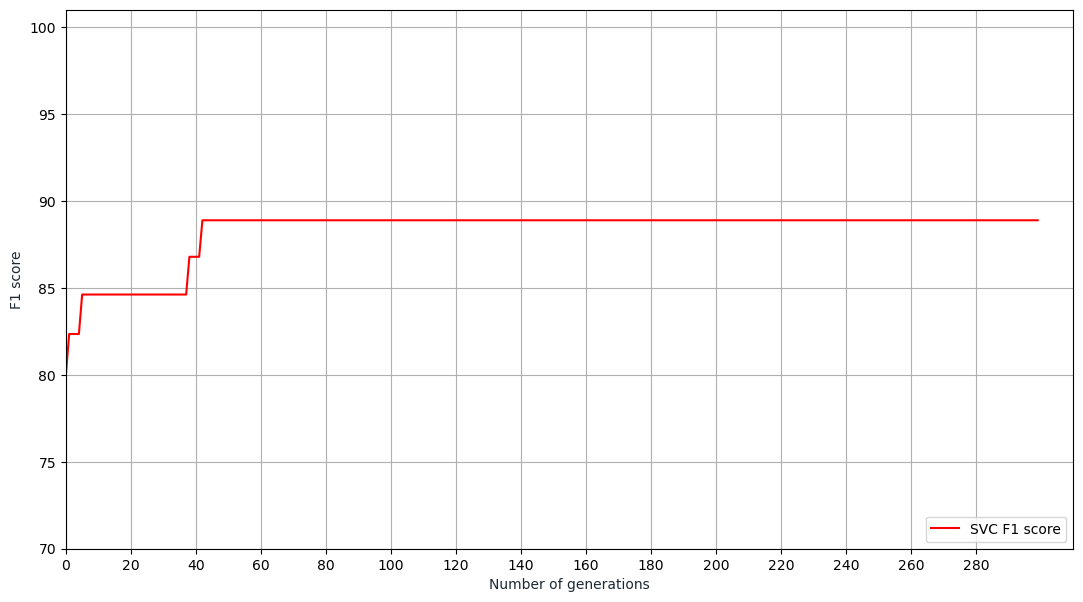

In [33]:
y_graph = np.array(y_ax)
x_graph = np.arange(0, n_generations)

plt.figure(figsize=(13,7))
plt.ylim((70, 101))
plt.xlim(right=n_generations+10)
plt.xticks(np.arange(0, n_generations, step=20))
plt.plot(x_graph, y_graph, '-r', label='SVC F1 score')
plt.xlabel('Number of generations', color='#1C2833')
plt.ylabel('F1 score', color='#1C2833')
plt.legend(loc='lower right')
plt.grid()
plt.show()